In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/Boston House Prices.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     506 non-null    float64
 1   Distance  506 non-null    float64
 2   Value     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [ ]:
df.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


In [ ]:
df.isnull().sum()

,0
Rooms,0
Distance,0
Value,0


In [ ]:
df["Distance"]

,Distance
0,4.0900
1,4.9671
2,4.9671
3,6.0622
4,6.0622
...,...
501,2.4786
502,2.2875
503,2.1675
504,2.3889


In [ ]:
df.head()

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


<Axes: >

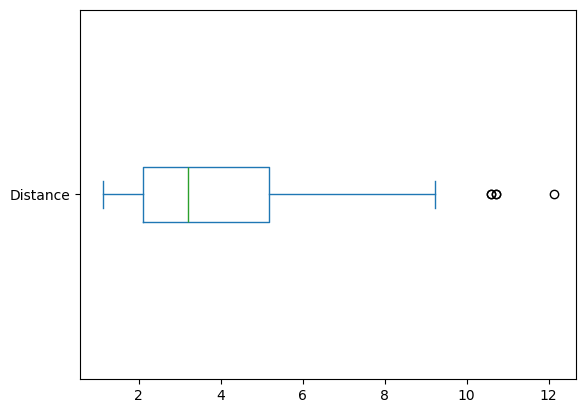

In [ ]:
df["Distance"].plot(kind = "box", vert = False)

In [ ]:
df["Distance"].value_counts()

,count
Distance,
3.4952,5
6.8147,4
5.2873,4
5.4007,4
5.7209,4
...,...
1.7984,1
1.7659,1
1.7573,1


In [ ]:
df["Distance"].describe()

,Distance
count,506.000000
mean,3.795043
std,2.105710
min,1.129600
25%,2.100175
50%,3.207450
75%,5.188425
max,12.126500


In [ ]:
 df["Distance"].quantile(0.75) - df["Distance"].quantile(0.25)

np.float64(3.0882500000000004)

In [ ]:
iqr =  df["Distance"].quantile(0.75) - df["Distance"].quantile(0.25)

In [ ]:
print(iqr)

3.0882500000000004


In [ ]:
first = df["Distance"].quantile(0.25) - 1.5*iqr

In [ ]:
print(first)

-2.5322000000000005


In [ ]:
second = df["Distance"].quantile(0.75) + 1.5*iqr

In [ ]:
print(second)

9.820800000000002


In [ ]:
df[(df["Distance"]> -2.5) &  (df["Distance"]<9.82)]

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


In [ ]:
import statsmodels.api as sm

In [ ]:
y = df["Value"]
x = df["Rooms"]

<Axes: xlabel='Rooms', ylabel='Value'>

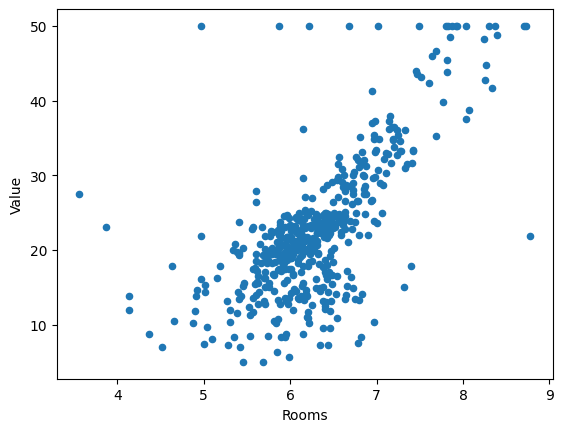

In [ ]:
df.plot(kind = "scatter", x = "Rooms", y = "Value")

In [ ]:
x = sm.add_constant(x)

In [ ]:
sm.OLS(y,x).fit()

In [ ]:
lm = sm.OLS(y,x).fit()

In [ ]:
lm.predict(x)

,0
0,25.175746
1,23.774021
2,30.728032
3,29.025938
4,30.382152
...,...
501,25.339584
502,21.034286
503,28.825691
504,27.169108


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           2.49e-74
Time:                        00:09:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""